



# <u><b> Objective </b></u>
## <b>To predict the whether a customer will churn or not, based on the variables available in the Telco customer churn data. </b>


### Logistic regression does not make many of the key assumptions of linear regression and general linear models that are based on ordinary least squares algorithms – particularly regarding linearity, normality, homoscedasticity, and measurement level.

### First, logistic regression does not require a linear relationship between the dependent and independent variables.  Second, the error terms (residuals) do not need to be normally distributed.  Third, homoscedasticity is not required.  Finally, the dependent variable in logistic regression is not measured on an interval or ratio scale.

### However, some other assumptions still apply.

### First, binary logistic regression requires the dependent variable to be binary and ordinal logistic regression requires the dependent variable to be ordinal.

### Second, logistic regression requires the observations to be independent of each other.  In other words, the observations should not come from repeated measurements or matched data.

### Third, logistic regression requires there to be little or no multicollinearity among the independent variables.  This means that the independent variables should not be too highly correlated with each other.

### Fourth, logistic regression assumes linearity of independent variables and log odds.  although this analysis does not require the dependent and independent variables to be related linearly, it requires that the independent variables are linearly related to the log odds.


### <b> In this assignment, you need to do the following : </b>

* ### Remove correlated variables and run Logistic Regression
* ### Also implement regularized logistic regression using the hyperparameter C in the sklearn implementation. Add details about how this hyperparameter affects the learning and performance of the model.
* ### Evaluate your logistic regression models using metrics such as roc_auc, log_loss, precision, recall, accuracy and f-score. You already know these metrics from your assignments in Module 1. Explain your observations about these metrics results.

# New Section
### Importing required librarries


In [ ]:
import os
import glob


In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import  warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# EDA Process 
1. Understading of the data
2. extracting required data from row data
3. data preparation 


In [ ]:
dataset = pd.read_csv(r'/content/drive/MyDrive/data science/WA_Fn-UseC_-Telco-Customer-Churn.csv')
dataset.head(50)



,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [ ]:
dataset.describe(include = 'all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


In [ ]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Data preparation 

In [ ]:
data_pr = dataset.copy()

In [ ]:
for col in [x for x in data_pr.describe(include = 'O').columns if x not in ['customerID']]:
  print(col,'  :',data_pr[col].unique())

gender   : ['Female' 'Male']
Partner   : ['Yes' 'No']
Dependents   : ['No' 'Yes']
PhoneService   : ['No' 'Yes']
MultipleLines   : ['No phone service' 'No' 'Yes']
InternetService   : ['DSL' 'Fiber optic' 'No']
OnlineSecurity   : ['No' 'Yes' 'No internet service']
OnlineBackup   : ['Yes' 'No' 'No internet service']
DeviceProtection   : ['No' 'Yes' 'No internet service']
TechSupport   : ['No' 'Yes' 'No internet service']
StreamingTV   : ['No' 'Yes' 'No internet service']
StreamingMovies   : ['No' 'Yes' 'No internet service']
Contract   : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling   : ['Yes' 'No']
PaymentMethod   : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges   : ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn   : ['No' 'Yes']


In [ ]:
encoding = {'Yes':1,'No':0,'No internet service':0,'No phone service':0}


In [ ]:
data_pr = data_pr.replace(encoding)
data_pr

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,0,DSL,0,...,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,0,DSL,1,...,1,0,0,0,One year,0,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,0,0,2,1,0,DSL,1,...,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,0,0,DSL,1,...,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,1,0,Fiber optic,0,...,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,1,1,24,1,1,DSL,1,...,1,1,1,1,One year,1,Mailed check,84.80,1990.5,0
7039,2234-XADUH,Female,0,1,1,72,1,1,Fiber optic,0,...,1,0,1,1,One year,1,Credit card (automatic),103.20,7362.9,0
7040,4801-JZAZL,Female,0,1,1,11,0,0,DSL,1,...,0,0,0,0,Month-to-month,1,Electronic check,29.60,346.45,0
7041,8361-LTMKD,Male,1,1,0,4,1,1,Fiber optic,0,...,0,0,0,0,Month-to-month,1,Mailed check,74.40,306.6,1


In [ ]:
data_pr = pd.get_dummies(data_pr,columns=['gender','InternetService','Contract','PaymentMethod'],prefix=['gen','inter_serv','contr','pymtmeth'])
data_pr

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,inter_serv_0,inter_serv_DSL,inter_serv_Fiber optic,contr_Month-to-month,contr_One year,contr_Two year,pymtmeth_Bank transfer (automatic),pymtmeth_Credit card (automatic),pymtmeth_Electronic check,pymtmeth_Mailed check
0,7590-VHVEG,0,1,0,1,0,0,0,1,0,...,0,1,0,1,0,0,0,0,1,0
1,5575-GNVDE,0,0,0,34,1,0,1,0,1,...,0,1,0,0,1,0,0,0,0,1
2,3668-QPYBK,0,0,0,2,1,0,1,1,0,...,0,1,0,1,0,0,0,0,0,1
3,7795-CFOCW,0,0,0,45,0,0,1,0,1,...,0,1,0,0,1,0,1,0,0,0
4,9237-HQITU,0,0,0,2,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,0,1,1,24,1,1,1,0,1,...,0,1,0,0,1,0,0,0,0,1
7039,2234-XADUH,0,1,1,72,1,1,0,1,1,...,0,0,1,0,1,0,0,1,0,0
7040,4801-JZAZL,0,1,1,11,0,0,1,0,0,...,0,1,0,1,0,0,0,0,1,0
7041,8361-LTMKD,1,1,0,4,1,1,0,0,0,...,0,0,1,1,0,0,0,0,0,1


In [ ]:
data_pr = data_pr.drop('customerID',axis=1)

In [ ]:
data_pr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 28 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   SeniorCitizen                       7043 non-null   int64  
 1   Partner                             7043 non-null   int64  
 2   Dependents                          7043 non-null   int64  
 3   tenure                              7043 non-null   int64  
 4   PhoneService                        7043 non-null   int64  
 5   MultipleLines                       7043 non-null   int64  
 6   OnlineSecurity                      7043 non-null   int64  
 7   OnlineBackup                        7043 non-null   int64  
 8   DeviceProtection                    7043 non-null   int64  
 9   TechSupport                         7043 non-null   int64  
 10  StreamingTV                         7043 non-null   int64  
 11  StreamingMovies                     7043 no

In [ ]:
features = [x for x in data_pr.describe().columns if 'Churn' not in x]
print(len(features))
print(features)

26
['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'MonthlyCharges', 'gen_Female', 'gen_Male', 'inter_serv_0', 'inter_serv_DSL', 'inter_serv_Fiber optic', 'contr_Month-to-month', 'contr_One year', 'contr_Two year', 'pymtmeth_Bank transfer (automatic)', 'pymtmeth_Credit card (automatic)', 'pymtmeth_Electronic check', 'pymtmeth_Mailed check']


In [ ]:
data_pr.shape

(7043, 28)

In [ ]:
x = data_pr[features].copy()
y = data_pr['Churn'].copy()

# Data preparation completed

# ML training process

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.2,random_state=0)
x_train.shape
x_test.shape

(1409, 26)

In [ ]:
y_train.value_counts()


0    4133
1    1501
Name: Churn, dtype: int64

In [ ]:
y_test.value_counts()

0    1041
1     368
Name: Churn, dtype: int64

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(fit_intercept=True,max_iter=10000)
clf.fit(x_train,y_train)

LogisticRegression(max_iter=10000)

In [ ]:
clf.score(x_train,y_train)

0.8052893148739794

In [ ]:
clf.score(x_test,y_test)

0.7984386089425124

In [ ]:
clf.coef_

array([[ 0.24488738,  0.04342116, -0.23047628, -0.0358407 , -0.68536599,
         0.31036532, -0.39551689, -0.26819227, -0.03895011, -0.35682385,
         0.2197776 ,  0.09269008,  0.36525359,  0.01151265, -0.1951842 ,
        -0.25799933, -0.66718013, -0.17985949,  0.39385608,  0.53534318,
        -0.21507942, -0.77344729, -0.17332019, -0.30477095,  0.16719276,
        -0.14228516]])

In [ ]:
clf.intercept_

array([-0.47739919])

In [ ]:
train_pred = clf.predict_proba(x_train)
test_pred = clf.predict_proba(x_test)

In [ ]:
train_pred

array([[0.99148977, 0.00851023],
       [0.30905456, 0.69094544],
       [0.99399365, 0.00600635],
       ...,
       [0.99183848, 0.00816152],
       [0.25866193, 0.74133807],
       [0.87364055, 0.12635945]])

In [ ]:
test_pred

array([[0.83822059, 0.16177941],
       [0.9188052 , 0.0811948 ],
       [0.54752183, 0.45247817],
       ...,
       [0.76155266, 0.23844734],
       [0.78419185, 0.21580815],
       [0.58682949, 0.41317051]])

In [ ]:
train_class_pred =clf.predict(x_train)
test_class_pred = clf.predict(x_test)

# Accuracy testing of data train

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
import seaborn as sns

In [ ]:
train_accuracy = accuracy_score(train_class_pred,y_train)
test_accuracy = accuracy_score(test_class_pred,y_test)

print('The train accuracy socre : ',train_accuracy)
print('The test accuracy score : ',test_accuracy)

The train accuracy socre :  0.8052893148739794
The test accuracy score :  0.7984386089425124


[[3706  427]
 [ 670  831]]


[Text(0, 0.5, 'retained'), Text(0, 1.5, 'churned')]

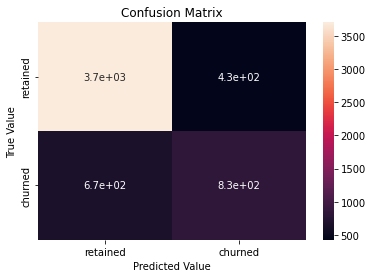

In [ ]:
# get the confusion matrix for trian 
label = ['retained','churned']
cm = confusion_matrix(y_train,train_class_pred)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels and titles
ax.set_ylabel('True Value')
ax.set_xlabel('Predicted Value')
ax.set_title ('Confusion Matrix')
ax.xaxis.set_ticklabels(label)
ax.yaxis.set_ticklabels(label)

[[933 108]
 [176 192]]


[Text(0, 0.5, 'retained'), Text(0, 1.5, 'churned')]

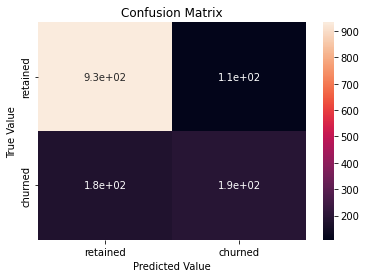

In [ ]:
# get the confusion matrix for test
label = ['retained','churned']
cm = confusion_matrix(y_test,test_class_pred)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels and titles
ax.set_ylabel('True Value')
ax.set_xlabel('Predicted Value')
ax.set_title ('Confusion Matrix')
ax.xaxis.set_ticklabels(label)
ax.yaxis.set_ticklabels(label)

# Cross validate

In [ ]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import cross_validate

In [ ]:
logistic= LogisticRegression()

In [ ]:
scoring = ['accuracy']
score = cross_validate(logistic,x_train,y_train,scoring = scoring,cv=5,return_train_score=True,return_estimator=True,verbose=20)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] START .....................................................................
[CV] END ................ accuracy: (train=0.802, test=0.816) total time=   0.1s
[CV] START .....................................................................
[CV] END ................ accuracy: (train=0.808, test=0.799) total time=   0.1s
[CV] START .....................................................................
[CV] END ................ accuracy: (train=0.809, test=0.793) total time=   0.1s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.4s remaining:    0.0s


[CV] END ................ accuracy: (train=0.810, test=0.786) total time=   0.1s
[CV] START .....................................................................
[CV] END ................ accuracy: (train=0.805, test=0.817) total time=   0.1s


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.7s finished


In [ ]:
score['train_accuracy']

array([0.80230752, 0.8082982 , 0.80852008, 0.80985134, 0.80523514])

In [ ]:
score['test_accuracy']

array([0.81632653, 0.79946761, 0.79325643, 0.78615794, 0.81705151])

In [ ]:
score['estimator']

[LogisticRegression(),
 LogisticRegression(),
 LogisticRegression(),
 LogisticRegression(),
 LogisticRegression()]

In [ ]:
for model in score['estimator']:
  print(model.coef_) 

[[ 0.22070821 -0.00125176 -0.1872978  -0.03391033 -0.67410702  0.35940409
  -0.38302955 -0.30588416 -0.03329509 -0.32264755  0.2008584   0.0384949
   0.28379901  0.01156915 -0.21035898 -0.26025118 -0.66790325 -0.19249004
   0.38978313  0.62562626 -0.21426247 -0.88197395 -0.15977823 -0.29227386
   0.14122245 -0.15978053]]
[[ 0.20165997  0.04533386 -0.24854741 -0.03401594 -0.73433868  0.27354789
  -0.32856242 -0.32285028 -0.06733546 -0.29803779  0.14714509  0.09016966
   0.3684162   0.0111334  -0.1405135  -0.29716215 -0.66657957 -0.21323278
   0.44213669  0.53199817 -0.21986052 -0.7498133  -0.21747866 -0.35944113
   0.22001981 -0.08077566]]
[[ 0.25302679  0.06072104 -0.26115829 -0.03830121 -0.65382066  0.27980705
  -0.39762772 -0.23868491 -0.02673049 -0.35592398  0.29329795  0.10493133
   0.3288785   0.0124513  -0.20777885 -0.24468384 -0.65415017 -0.14900511
   0.35069259  0.50678123 -0.18886174 -0.77038219 -0.1355186  -0.28668148
   0.18093112 -0.21119372]]
[[ 0.23724253  0.05578612 -0.